In [1]:
raw_data = {
    "CMA-ES": {
        "Training Duration": 8.87,#1
        "Reward": -74.99,#4
        "Emissions": 0.2,#1
        "Peak Traffic": 28,#3
        "Distance": 36.89,#2
        "Energy": 19.74#4
    },
    "DQN": {
        "Training Duration": 24.94,#3
        "Reward": -66.06,#3
        "Emissions": 0.44,#2
        "Peak Traffic": 23,#1
        "Distance": 37.15,#4
        "Energy": 19.36#2
    },
    "ODT": {
        "Training Duration": 37.64,#4
        "Reward": -62.36,#1
        "Emissions": 2.24,#4
        "Peak Traffic": 24,#2
        "Distance": 36.84,#1
        "Energy": 18.76#1
    },
    "REINFORCE": {
        "Training Duration": 17.91,#2
        "Reward": -63.58,#2
        "Emissions": 0.35,#3
        "Peak Traffic": 32,#4
        "Distance": 37.08,#3
        "Energy": 19.65#3
    }
}

colors = {
    "DQN": 'darkorange',
    "REINFORCE": 'forestgreen',
    "CMA-ES": 'cyan',
    "ODT": 'blueviolet',
}

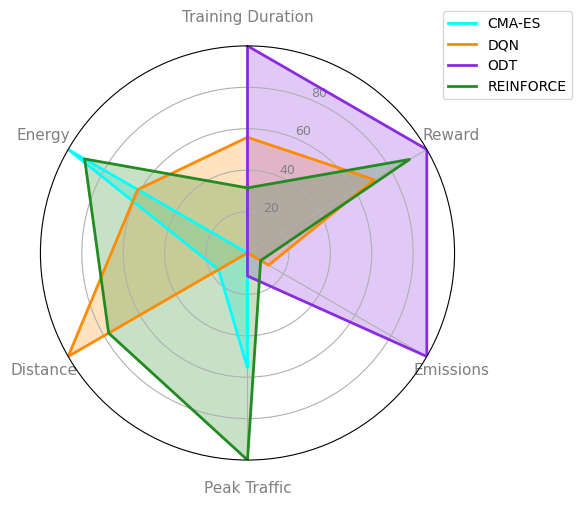

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def scale_data_to_0_100(data, feature_range=(0,100)):
    features = list(next(iter(data.values())).keys())
    lower, upper = feature_range
    mins = {f: min(d[f] for d in data.values()) for f in features}
    maxs = {f: max(d[f] for d in data.values()) for f in features}

    scaled = {}
    for alg, feats in data.items():
        scaled[alg] = {}
        for f, v in feats.items():
            min_v, max_v = mins[f], maxs[f]
            if max_v == min_v:
                scaled_val = (lower + upper) / 2
            else:
                scaled_val = (v - min_v) / (max_v - min_v) * (upper - lower) + lower
            scaled_val = max(lower, min(upper, scaled_val))
            scaled[alg][f] = scaled_val
    return scaled

def make_fifa_radar(data, title=None):
    categories = list(next(iter(data.values())).keys())
    N = len(categories)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=11)
    ax.tick_params(axis='x', which='major', pad=10)
    plt.yticks([20,40,60,80], ["20","40","60","80"], color="grey", size=9)
    plt.ylim(0,100)

    for alg, scores in data.items():
        vals = list(scores.values()) + [list(scores.values())[0]]
        c = colors.get(alg, 'grey')  # default to grey if missing
        ax.plot(angles, vals, color=c, linewidth=2, label=alg)
        ax.fill(angles, vals, color=c, alpha=0.25)

    if title:
        plt.title(title, size=15, y=1.08)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.1))
    plt.tight_layout()

    plt.savefig('./Figures/dm_profiles.png', dpi=300, bbox_inches='tight')

    plt.show()
# scaled = scale_data_to_0_100(raw_data)
# make_fifa_radar(scaled)

scaled = scale_data_to_0_100(raw_data)
# # invert everything except Reward
# for alg, feats in scaled.items():
#     for metric, val in feats.items():
#         if metric != 'Reward':
#             feats[metric] = 100 - val

make_fifa_radar(scaled)

In [3]:
raw_data = {
    "CMA-ES": {
        "Training Duration": 8.87,
        "Reward": -74.99,
        "Emissions": 0.2,
        "Peak Traffic": 28,
        "Distance": 36.89,
        "Energy": 19.74
    },
    "DQN": {
        "Training Duration": 24.94,
        "Reward": -66.06,
        "Emissions": 0.44,
        "Peak Traffic": 23,
        "Distance": 37.15,
        "Energy": 19.36
    },
    "ODT": {
        "Training Duration": 37.64,
        "Reward": -62.36,
        "Emissions": 2.24,
        "Peak Traffic": 24,
        "Distance": 36.84,
        "Energy": 18.76
    },
    "REINFORCE": {
        "Training Duration": 17.91,
        "Reward": -63.58,
        "Emissions": 0.35,
        "Peak Traffic": 32,
        "Distance": 37.08,
        "Energy": 19.65
    }
}

colors = {
    "DQN": 'darkorange',
    "REINFORCE": 'forestgreen',
    "CMA-ES": 'cyan',
    "ODT": 'blueviolet',
}

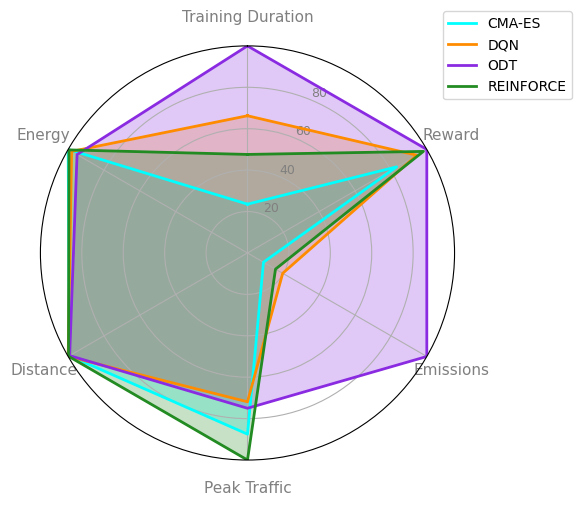

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def percent_of_best(data):
    #Feature names and their bests
    features = list(next(iter(data.values())).keys())
    mins   = {f: min(d[f] for d in data.values()) for f in features}
    maxs   = {f: max(d[f] for d in data.values()) for f in features}

    #Scale as percent of "best" value
    scaled = {}
    for alg, feats in data.items():
        scaled[alg] = {}
        for f, v in feats.items():
            if f == "Reward":
                # Max is better (reward .)
                pct = (maxs[f] / v) * 100
            else:
                # Min is better metrics
               #pct = (maxs[f] / v) * 100
                pct = (v / maxs[f]) * 100

            scaled[alg][f] = pct

    return scaled


def make_fifa_radar(data, title=None):
    categories = list(next(iter(data.values())).keys())
    N = len(categories)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=11)
    ax.tick_params(axis='x', which='major', pad=10)
    plt.yticks([20,40,60,80], ["20","40","60","80"], color="grey", size=9)
    plt.ylim(0,100)

    for alg, scores in data.items():
        vals = list(scores.values()) + [list(scores.values())[0]]
        c = colors.get(alg, 'grey')  # default to grey if missing
        ax.plot(angles, vals, color=c, linewidth=2, label=alg)
        ax.fill(angles, vals, color=c, alpha=0.25)

    if title:
        plt.title(title, size=15, y=1.08)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.1))
    plt.tight_layout()

    plt.savefig('./Figures/dm_profiles_inverted.png', dpi=300, bbox_inches='tight')

    plt.show()

scaled = percent_of_best(raw_data)

make_fifa_radar(scaled)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def percent_of_best(data):
    #Feature names and their bests
    features = list(next(iter(data.values())).keys())
    data.values() = abs(data.values())
    mins   = {f: min(d[f] for d in data.values()) for f in features}
    # maxs   = {f: max(d[f] for d in data.values()) for f in features}

    #Scale as percent of "best" value
    scaled = {}
    for alg, feats in data.items():
        scaled[alg] = {}
        for f, v in feats.items():
            # Min is better metrics
            pct = (mins[f] / v) * 100

            scaled[alg][f] = pct

    return scaled


def make_fifa_radar(data, title=None):
    categories = list(next(iter(data.values())).keys())
    N = len(categories)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=11)
    ax.tick_params(axis='x', which='major', pad=10)
    plt.yticks([20,40,60,80], ["20","40","60","80"], color="grey", size=9)
    plt.ylim(0,100)

    for alg, scores in data.items():
        vals = list(scores.values()) + [list(scores.values())[0]]
        c = colors.get(alg, 'grey')  # default to grey if missing
        ax.plot(angles, vals, color=c, linewidth=2, label=alg)
        ax.fill(angles, vals, color=c, alpha=0.25)

    if title:
        plt.title(title, size=15, y=1.08)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.1))
    plt.tight_layout()

    plt.savefig('./Figures/dm_profiles_inverted.png', dpi=300, bbox_inches='tight')

    plt.show()

scaled = percent_of_best(raw_data)

make_fifa_radar(scaled)

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (1892756324.py, line 7)

In [18]:
import pandas as pd

In [23]:
df = pd.DataFrame(raw_data).T
df.Reward = df.Reward.abs()

,Training Duration,Reward,Emissions,Peak Traffic,Distance,Energy
CMA-ES,8.87,74.99,0.20,28.0,36.89,19.74
DQN,24.94,66.06,0.44,23.0,37.15,19.36
ODT,37.64,62.36,2.24,24.0,36.84,18.76
REINFORCE,17.91,63.58,0.35,32.0,37.08,19.65
